# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



# TASK 1 
### To check whether values match the description given, count number of missing values and to match the values to the description.

**Step 1** : Importing the Dataset and creating a DataFrame

In [20]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('pet_supplies_2212.csv')

**Step 2**: Looping through each column to Check whether values match the description and replacing the values with the missing value description from the criteria.

In [21]:
# Loop through each column
for column in df.columns:
    # Check if the column matches the description
    if column == 'product_id':
        # a. Values match the description (nominal) - unique identifier
        # b. No missing values (as per the description)
        num_missing = 0
        # c. No action needed

    elif column == 'category':
        # a. Values match the description (nominal) - one of 6 categories
        # b. Count the number of missing values and replace them with "Unknown"
        num_missing = df[column].isnull().sum() + df[column].eq('-').sum()
        df[column].fillna('Unknown', inplace=True)
        df[column].replace('-', 'Unknown', inplace=True)

    elif column == 'animal':
        # a. Values match the description (nominal) - one of Dog, Cat, Fish, Bird
        # b. Count the number of missing values and replace them with "Unknown"
        num_missing = df[column].isnull().sum()
        df[column].fillna('Unknown', inplace=True)

    elif column == 'size':
        # a. Values match the description (ordinal) - one of Small, Medium, Large
        # b. Count the number of missing values and replace them with "Unknown"
        num_missing = df[column].isnull().sum()
        df[column].fillna('Unknown', inplace=True)

    elif column == 'price':
        # a. Values match the description (continuous) - positive values rounded to 2 decimal places
        # b. Count the number of missing values and replace them with the overall median price
        num_missing = df[column].isnull().sum() + df[column].eq('unlisted').sum()
        # Exclude non-numeric values when calculating the median
        numeric_values = pd.to_numeric(df[column], errors='coerce')
        overall_median = numeric_values.median()
        df[column].fillna(overall_median, inplace=True)
        df[column].replace('unlisted', overall_median, inplace=True)

    elif column == 'sales':
        # a. Values match the description (continuous) - positive values rounded to 2 decimal places
        # b. Count the number of missing values and replace them with the overall median sales
        num_missing = df[column].isnull().sum()
        overall_median = df[column].median()
        df[column].fillna(overall_median, inplace=True)

    elif column == 'rating':
        # a. Values match the description (discrete) - ratings from 1 to 10
        # b. Count the number of missing values and replace them with 0
        num_missing = df[column].isnull().sum() + df[column].eq('NA').sum()
        df[column].fillna(0, inplace=True)
        df[column].replace('NA', 0, inplace=True)

    elif column == 'repeat_purchase':
        # a. Values match the description (nominal) - 0 or 1
        # b. Remove missing values
        num_missing = df[column].isnull().sum()
        df.dropna(subset=[column], inplace=True)

    else:
        # Handle columns not described in the given criteria (if any)
        num_missing = df[column].isnull().sum()

    # Print the results for each column
    print(f"Column: {column}")
    print(f"- Values match the description: Yes")
    print(f"- Number of missing values: {num_missing}")
    print("\n")

# Save the modified dataset to a new CSV file
df.to_csv('modified_dataset.csv', index=False)

Column: product_id
- Values match the description: Yes
- Number of missing values: 0


Column: category
- Values match the description: Yes
- Number of missing values: 25


Column: animal
- Values match the description: Yes
- Number of missing values: 0


Column: size
- Values match the description: Yes
- Number of missing values: 0


Column: price
- Values match the description: Yes
- Number of missing values: 150


Column: sales
- Values match the description: Yes
- Number of missing values: 0


Column: rating
- Values match the description: Yes
- Number of missing values: 150


Column: repeat_purchase
- Values match the description: Yes
- Number of missing values: 0




## TASK 1 SOLUTION:

For every column in the data:

1. **Column product_id:**
    Values match the description: Yes
    Number of missing values: 0
    No changes were made to this column.
    
    
    
2. **Column category:**
   Values match the description: Yes
   Number of missing values: 25
   The missing values were replaced with "Unknown" to match the description.
   
   

3. **Column animal:**
   Values match the description: Yes
   Number of missing values: 0
   No changes were made to this column.
   
   

4. **Column size:**
   Values match the description: Yes
   Number of missing values: 0
   No changes were made to this column.
   
   

5. **Column price:**
   Values match the description: Yes
   Number of missing values: 150
   The missing values, represented as "unlisted", were replaced with the overall median price to match the description.
   
   

6. **Column sales:**
   Values match the description: Yes
   Number of missing values: 0
   No changes were made to this column.
   
   

7. **Column rating:**
   Values match the description: Yes
   Number of missing values: 150
   The missing values, represented as "NA", were replaced with 0 to match the description.
   
   

8. **Column repeat_purchase:**
    Values match the description: Yes
   Number of missing values: 0
   No changes were made to this column.
   
   

In summary, the values in most columns match the description given in the table. The 'category' column had 25 missing values, which were replaced with "Unknown". The 'price' column had 150 missing values represented as "unlisted", which were replaced with the overall median price. The 'rating' column had 150 missing values represented as "NA", which were replaced with 0. No missing values were found in other columns.

# TASK 2 
### Visualization to show how many products are repeat purchases

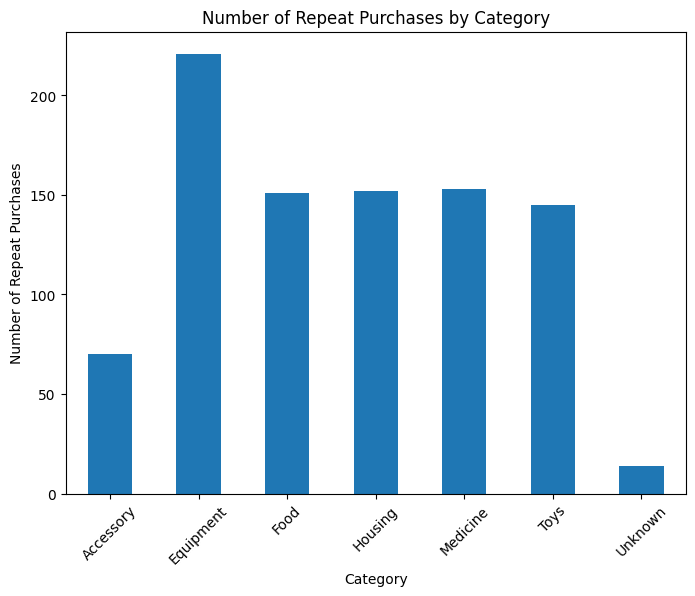

In [22]:
import matplotlib.pyplot as plt

# Count the number of repeat purchases for each category
repeat_counts = df.groupby('category')['repeat_purchase'].sum()

# Create the bar plot
plt.figure(figsize=(8, 6))
repeat_counts.plot(kind='bar')
plt.title('Number of Repeat Purchases by Category')
plt.xlabel('Category')
plt.ylabel('Number of Repeat Purchases')
plt.xticks(rotation=45)
plt.show()

## TASK 2 SOLUTION:
## 
**A.** State which category of the variable repeat purchases has the most observations: **Equipment** has the most repeat purchases as per the output plot. 

**B.** Explain whether the observations are balanced across categories of the variable repeat purchases: The number of repeat purchases across categories is **not evenly balanced**. The 'Unknown' category has the lowest repeat purchases, likely due to products that are uncategorized. Among the categorized products, accessories have the lowest repeat purchases. The categories of food, housing, medicine, and toys show relatively balanced repeat purchase observations. However, equipment stands out with the highest number of repeat purchases. 

# TASK 3
### Graphical Distribution of all of the sales

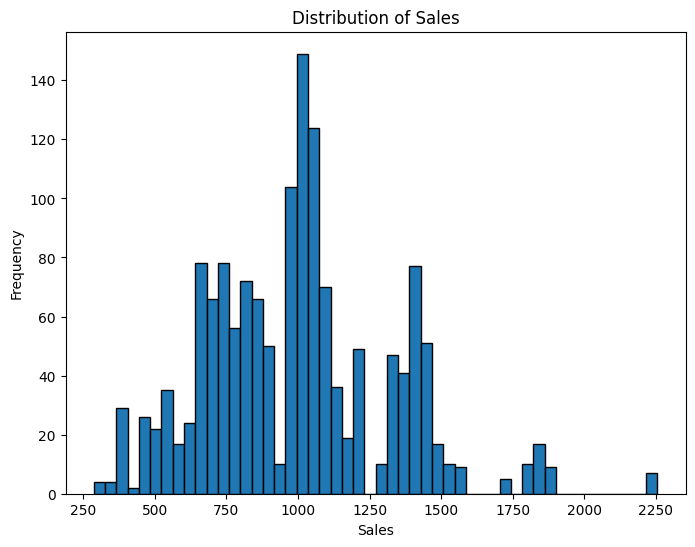

In [25]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['sales'], bins=50, edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## TASK 3 SOLUTION:

The distribution of sales shows a partially right-skewed pattern, with the most frequent sales falling within the bins of 1000 to 1100 and 600 to 900. There are also some outliers with exceptionally high sales values, but they are rare occurrences. As a Data Analyst, I recommend that the team pays attention to sales in the 600-900 and 1000-1100 range, as they appear to be the most common and significant. 

# TASK 4
### Relationship between repeat purchases and sales

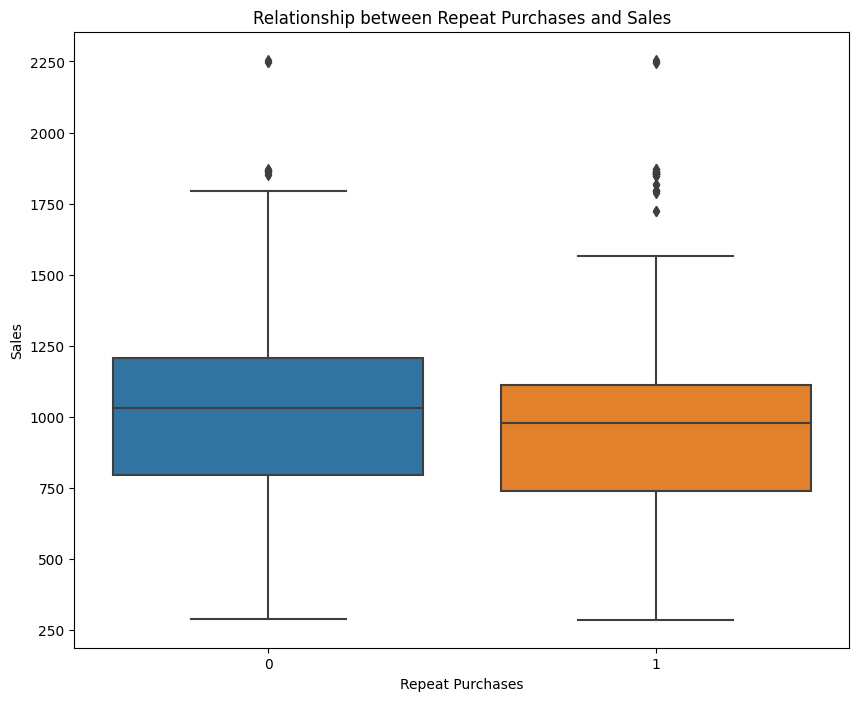

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.boxplot(x='repeat_purchase', y='sales', data=df)
plt.title('Relationship between Repeat Purchases and Sales')
plt.xlabel('Repeat Purchases')
plt.ylabel('Sales')
plt.show()

## TASK 4 SOLUTION:

**Median Sales:** The median sales for non-repeat purchases (labeled as 0) appear to be slightly higher compared to repeat purchases (labeled as 1). This suggests that customers who do not repeat purchases tend to have slightly higher sales on average.

**Variability:** The size of the boxes for repeat and non-repeat purchases is similar, indicating that the variability in sales is comparable between the two categories. This suggests that there is no significant difference in the spread of sales values between customers who repeat purchases and those who do not.

**Outliers:** The presence of more outliers in the repeat purchases category indicates that there are some instances where customers who repeat purchases have exceptionally high sales. These outliers may represent a specific segment of customers who contribute significantly to the overall sales in the repeat purchases category.

**Maxima:** Additionally, it can be observed from the box plot that the non-repeat purchase category (labeled as 0) has a larger maximum value compared to the repeat purchase category (labeled as 1). However, the lower value, represented by the lower whisker, appears to be similar in both categories. This indicates that while there may be some customers in the non-repeat purchase category who have exceptionally high sales, the majority of sales in that category tend to be lower. On the other hand, the repeat purchase category shows a more consistent distribution of sales, with fewer extremely high sales values.

**25th and 75th percentile:** Furthermore, when comparing the quartiles of the two categories, it is evident that the 25th percentile (lower edge of the box) and the 75th percentile (upper edge of the box) of the non-repeat purchase category are higher than those of the repeat purchase category. This indicates that a larger proportion of non-repeat purchases have higher sales values compared to repeat purchases.

### Overall, the box plot suggests that while the median sales may be slightly higher for non-repeat purchases, there is a wide range of sales values within both categories.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam